# ML basics


* Labels - things which we are predicting.
* Features - input variables
* Example - particular instance of the data
  * Labeled example is with feature and label
  * Unlabeled example is feature without label.
* Model - defines relationship between features and label
* Training - is creating or learning models. That is, show the models labeled example and enable them to learn the relationship. It is also learning good values of weights and bias from labeled examples.
* Inference - Applying the trained model to the unlabeld data.
* Regression - Predicts continuous values.
* Classification - predicts discrete values.
* Empirical risk minimization - It is the creating of model using many labeled example and attempting to find a model that minimizes loss.
* Loss - Number indicating how bad the prediction of a model on single example.
  * Squared loss - square of difference between the label and prediction.
  $$L_2 = (y - y')^2$$
  * Mean squared error - It is the average squared loss per example over whole dataset.
  $$MSE = \frac {1}{N} \sum (y-y')^2$$



# Reducing Loss

Iterative approach - Here the ML model is trained starting with the initial guess of the weights and bias. And iteratively adjusting these gusses until the model learns the new weight and bias which minimizes the loss.

Gradient Descent:
  * First stage is to pic the initial values for weight. It is choosen randomly or set to 0.
  * Gradient descent algorithm calculates the gradient of the loss curve at starting point. The gradient of the loss is equivalent to the derivative or slope of the curve. And tells which direction to head towards.
  * In case of multiple weights, gradient is the vector of partial derivatives with respect to the weights. and denoted as $\nabla$
  * Since it is a vector it has both magnitude and direction. The gradient always points in the steepest increase in the loss function.
  * The algorithm, takes the step in the negetive direction of the gradient in order to reduce the loss.
  * To determine the next point along the loss curve, the algorithm adds some fraction of the magnitude to the starting point. This fraction is decided based on the learning rate.
  * The procedure is repeated until convergence.

Learning Rate:
  * To determine the next point on the loss curve, the magnitude of the gradient vector is multiplied with a scalar value known as learning rate.
  * Hyperparameters are the knobs which are tuned by machine learning engineers. Learning rate tuning is one essential part.
  * Choosing learning rate - small: learning is slow, fast: learning of bad parameters.
  * The ideal learning rate for 2 or more dimension is the inverse of the Hessian.

Stochastic Gradient Descent:
  * A batch is the total number of examples used to calculate the gradient in a single iteration.
  * SGD uses one single exple per iteration. That is it uses a batch of size one per iteration.
  * mimi-batch-SGD: uses a mini batch of size around 10 to 1000 examples per iteration. this is a compromise between SGD and full batch.



# Intro to Pandas

In [1]:
from __future__ import print_function

import pandas as pd
pd.__version__

'0.25.3'

Two components:

Dataframe - its like relational data table with rows and columns.
Series - single colume of the data.

In [2]:
pd.Series(['San Fransisco', 'San Jose', 'Sacramento'])

0    San Fransisco
1         San Jose
2       Sacramento
dtype: object

In [3]:
city_names = pd.Series(['San Fransisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({"city_names": city_names, "population": population})

,city_names,population
0,San Fransisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [5]:
california_housing_department = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=',')
california_housing_department.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8064a1e48>]],
      dtype=object)

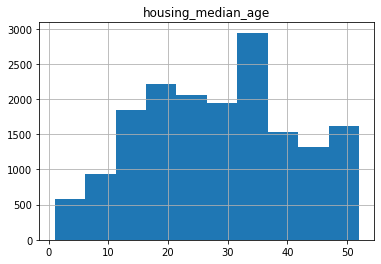

In [9]:
california_housing_department.hist(['housing_median_age'])

In [10]:
cities = pd.DataFrame({"city_names": city_names, "population": population})
print(type(cities['city_names']))
cities['city_names']

<class 'pandas.core.series.Series'>


0    San Fransisco
1         San Jose
2       Sacramento
Name: city_names, dtype: object

In [11]:
print(type(cities['city_names'][1]))
cities['city_names'][1]

<class 'str'>


'San Jose'

In [12]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,city_names,population
0,San Fransisco,852469
1,San Jose,1015785


In [13]:
# For more complex single-column transformations, you can use Series.apply. Like the Python map function, Series.apply accepts as an argument a lambda function, which is applied to each value.

population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

In [14]:
# Modifying DataFrames is also straightforward. For example, the following code adds two Series to an existing DataFrame:

cities['area_square_miles'] = pd.Series([46.87, 176.53, 97.92])
cities['population_density'] = cities['population'] / cities['area_square_miles']
cities

,city_names,population,area_square_miles,population_density
0,San Fransisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


In [18]:
cities['is_wide_has_saint_name'] = (cities['area_square_miles'] > 50) & cities['city_names'].apply(lambda name: name.startswith('San'))
cities

,city_names,population,area_square_miles,population_density,is_wide_has_saint_name
0,San Fransisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


In [19]:
cities.index

RangeIndex(start=0, stop=3, step=1)

In [20]:
cities.reindex([2, 0, 1])

,city_names,population,area_square_miles,population_density,is_wide_has_saint_name
2,Sacramento,485199,97.92,4955.055147,False
0,San Fransisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True


In [21]:
cities.reindex([3,4,2,1,0])

,city_names,population,area_square_miles,population_density,is_wide_has_saint_name
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
2,Sacramento,485199.0,97.92,4955.055147,False
1,San Jose,1015785.0,176.53,5754.177760,True
0,San Fransisco,852469.0,46.87,18187.945381,False


# Tensorflow Intro

In [0]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [25]:
# load dataset

california_housing_dataframe = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv', sep=',')
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66900.0
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80100.0
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85700.0
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73400.0
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65500.0


In [26]:
california_housing_dataframe.reindex(np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe['median_house_value'] /= 1000
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In this exercise, we'll try to predict median_house_value, which will be our label (sometimes also called a target). We'll use total_rooms as our input feature.

Categorical data - data that is textual

Numerical data - data that is numerical.



In [33]:
my_features = california_housing_dataframe[['total_rooms']]

feature_column = [tf.feature_column.numeric_column('total_rooms')]
feature_column

[NumericColumn(key='total_rooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [0]:
targets = california_housing_dataframe['median_house_value']

In [0]:
# Configure the LinearRegressor

my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

linear_regressor = tf.estimator.LinearRegressor(feature_columns=feature_column, optimizer=my_optimizer)

In [0]:
def my_input_func(features, targets, batch_size = 1, shuffle=True, epochs=None):

  '''
  feature: panda dataframe as features
  targets: panda dataframe as target
  batch_size: batch size for SGD
  shuffle: shuffle of examples
  epochs: number of epochs
  '''

  features = {key:np.array(value) for key,value in dict(features).items()}

  de = Dataset.from_tensor_slices((features, targets))
  de = de.batch(batch_size).repeat(epochs)

  if shuffle:
    de = de.shuffle(buffer_size=1000)

  features, labels = de.make_one_shot_iterator().get_next()

  return features, labels

In [0]:
# train the model
train = linear_regressor.train(input_fn=lambda: my_input_func(features=my_features, targets=targets), steps=100)

In [41]:
# evaluate the model

prediction_input_fn = lambda: my_input_func(my_features, targets, epochs = 1, shuffle=False)

prediction = linear_regressor.predict(input_fn=prediction_input_fn)

predictions = np.array([item['predictions'][0] for item in prediction])

MSE = metrics.mean_squared_error(predictions, targets)
RMSE = math.sqrt(MSE)
print("mean squared error:", MSE)
print("root mean squared error", RMSE)

mean squared error: 32122.777007385648
root mean squared error 179.22828182902845


In [42]:
min_house_value = california_housing_dataframe['median_house_value'].min()
max_house_value = california_housing_dataframe['median_house_value'].max()
min_max_diff = max_house_value - min_house_value

print("min house value: ", min_house_value)
print("max house value: ", max_house_value)
print("min max value: ", min_max_diff)
print("RMSE value: ", RMSE)

min house value:  14.999
max house value:  500.001
min max value:  485.00199999999995
RMSE value:  179.22828182902845


In [44]:
calibaration_data = pd.DataFrame()
calibaration_data['predictions'] = pd.Series(predictions)
calibaration_data['targets'] = pd.Series(targets)
calibaration_data.describe()

,predictions,targets
count,17000.0,17000.0
mean,79.3,207.3
std,65.4,116.0
min,0.1,15.0
25%,43.9,119.4
50%,63.8,180.4
75%,94.5,265.0
max,1138.1,500.0


In [0]:
sample = california_housing_dataframe.sample(n=300)

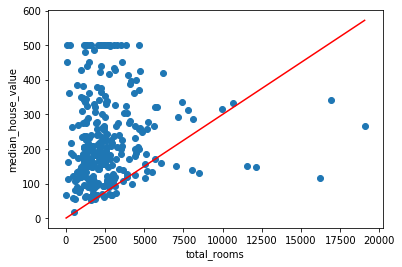

In [49]:
x0 = sample['total_rooms'].min()
x1 = sample['total_rooms'].max()

weights = linear_regressor.get_variable_value('linear/linear_model/total_rooms/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

y0 = weights * x0 + bias
y1 = weights * x1 + bias

plt.plot([x0,x1], [y0,y1], color='r')
plt.ylabel("median_house_value")
plt.xlabel("total_rooms")
plt.scatter(sample['total_rooms'], sample['median_house_value'])
plt.show()

In [0]:
# Tweaking hyperparameters

def train_model(learning_rate, steps, batch_size, input_feature='total_rooms'):

  '''
  learning rate: is the learning rate
  stpes: total number of training stpes
  batch_size: batch size number
  input_feature: which input feature to use
  '''

  periods = 10
  steps_per_period = steps/periods

  my_features = california_housing_dataframe[[input_feature]]
  targets = california_housing_dataframe['median_house_value']

  feature_column = [tf.feature_column.numeric_column(input_feature)]

  training_input_fn = lambda: my_input_func(my_features, targets, batch_size, shuffle=True)
  prediction_input_fn = lambda: my_input_func(my_features, targets, shuffle=False, epochs=1)

  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(feature_column, optimizer=my_optimizer)

  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.title("Learned Line by Period")
  plt.ylabel('median_house_value')
  plt.xlabel(input_feature)
  sample = california_housing_dataframe.sample(n=300)
  plt.scatter(sample[input_feature], sample['median_house_value'])
  colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]

  print("training model")
  print("RMSE on training data")
  RMSE = []
  for period in range(periods):

    train = linear_regressor.train(input_fn=training_input_fn, steps=steps_per_period)
    prediction = linear_regressor.predict(input_fn=prediction_input_fn)
    predictions = np.array([item['predictions'][0] for item in prediction])

    root_mean_square_error = math.sqrt(metrics.mean_squared_error(predictions, targets))
    RMSE.append(root_mean_square_error)

    weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights'%input_feature)[0]
    bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

    y_extns = np.array([0, sample['median_house_value'].max()])
    x_extns = (y_extns - bias) / weight
    x_extns = np.maximum(np.minimum(x_extns, sample[input_feature].max()), sample[input_feature].min())

    y_extns = weight * x_extns + bias

    plt.plot(x_extns, y_extns, color=colors[period])

  print("model training finished")

  plt.subplot(1, 2, 2)
  plt.ylabel('RMSE')
  plt.xlabel('Periods')
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(RMSE)

  calibaration_data = pd.DataFrame()
  calibaration_data['prediction'] = pd.Series(predictions)
  calibaration_data['targets'] = pd.Series(targets)
  calibaration_data.describe()

  print("final RMSE: ", root_mean_square_error)

  return calibaration_data

training model
RMSE on training data


Exception ignored in: <generator object Estimator.predict at 0x7fc7ba665db0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_estimator/python/estimator/estimator.py", line 650, in predict
    for key, value in six.iteritems(preds_evaluated)
  File "/usr/lib/python3.6/contextlib.py", line 99, in __exit__
    self.gen.throw(type, value, traceback)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/ops.py", line 5480, in get_controller
    yield g
  File "/usr/lib/python3.6/contextlib.py", line 99, in __exit__
    self.gen.throw(type, value, traceback)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/ops.py", line 5295, in get_controller
    type(default))
AssertionError: Nesting violated for default stack of <class 'tensorflow.python.framework.ops.Graph'> objects


model training finished
final RMSE:  170.15837721944118


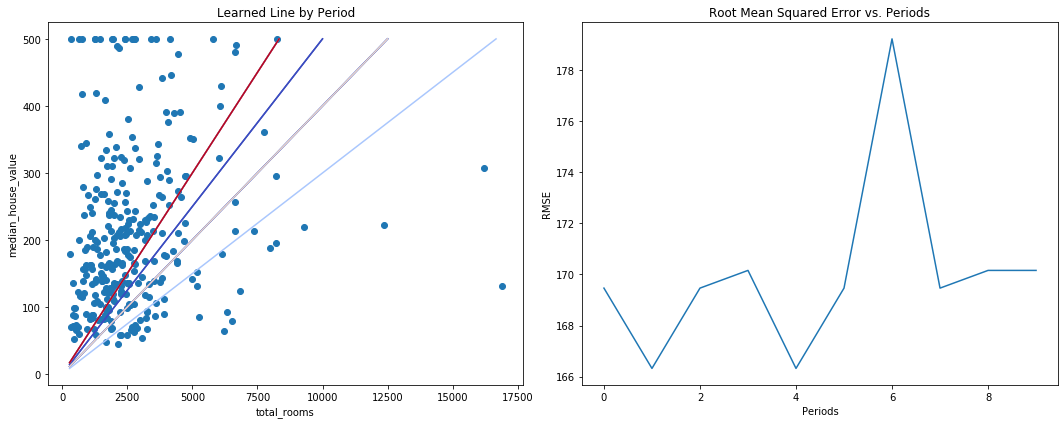

In [59]:
train_model(learning_rate=0.001, steps=100, batch_size=1)

training model
RMSE on training data
model training finished
final RMSE:  180.53451635820505


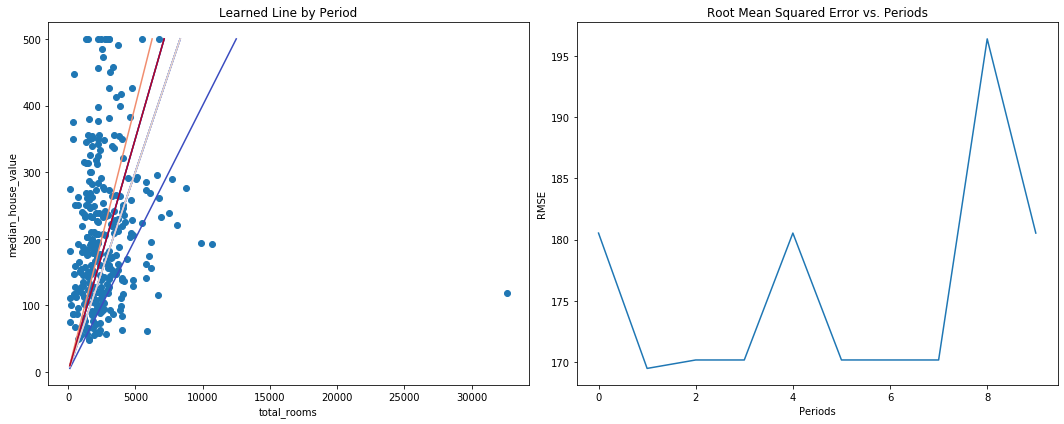

In [60]:
train_model(learning_rate=0.003, steps=500, batch_size=5)

training model
RMSE on training data
model training finished
final RMSE:  177.50442670762533


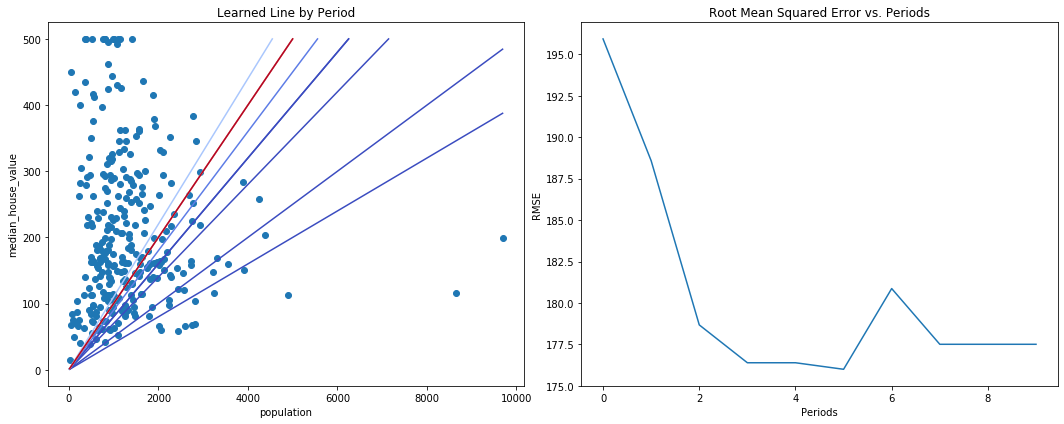

In [61]:
train_model(learning_rate=0.001, steps=100, batch_size=1, input_feature='population')

training model
RMSE on training data
model training finished
final RMSE:  232.4940859349976


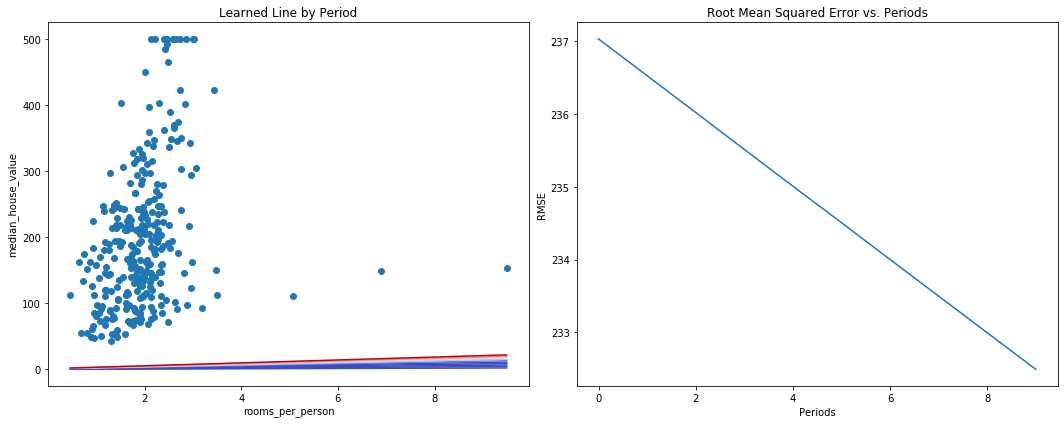

In [66]:
# creating a syinthetic feature

california_housing_dataframe['rooms_per_person'] = california_housing_dataframe['total_rooms'] / california_housing_dataframe['population']
calibration_data = train_model(learning_rate=0.05, steps=500, batch_size=5, input_feature='rooms_per_person')

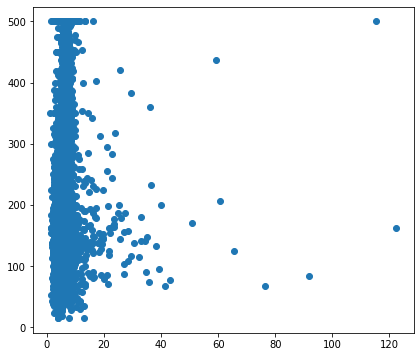

In [67]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(calibration_data['prediction'], calibration_data['targets'])

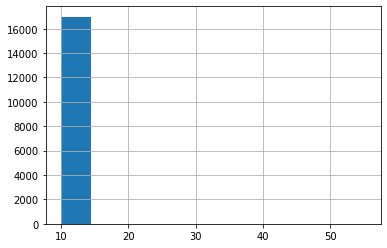

In [71]:
california_housing_dataframe['rooms_per_person'] = california_housing_dataframe['rooms_per_person'].apply(lambda val: max(val, 10))
california_housing_dataframe['rooms_per_person'].hist()

training model
RMSE on training data
model training finished
final RMSE:  215.92952621403612


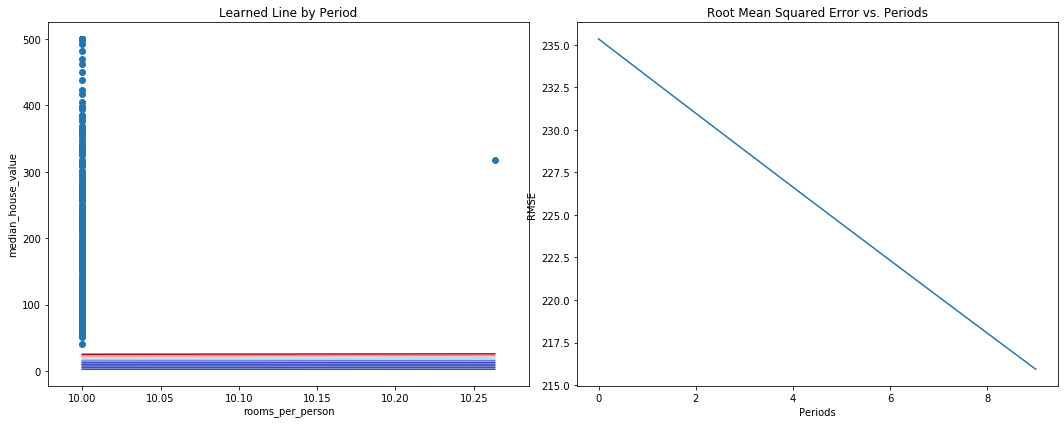

In [72]:
calibaration_data = train_model(learning_rate=0.05, steps=500, batch_size=5, input_feature='rooms_per_person')

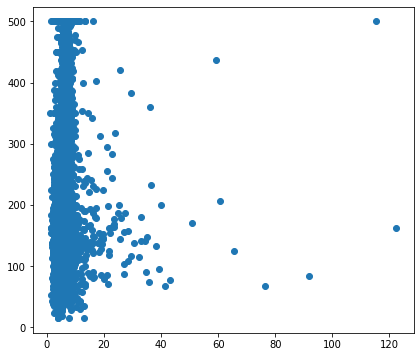

In [73]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(calibration_data['prediction'], calibration_data['targets'])